Point Mass in a Rotating Tube
=============================

Description of the problem
--------------------------

<img src="point_mass_rotating_tube_image.png" width="300" class="center"/>

Consider the dynamics of a point mass in a rotating tube governed by a second
order differential equation given by

\begin{align}
\delta\ddot{r}(t) = \left(\dot{\theta}^2(t)-\dfrac{k}{m}\right)\delta r(t)+u(t)+l\dot{\theta}^2(t)
\end{align}
where the new variable $\delta r(t) = r(t) - l$ has been introduced, together with the definition of $l$,
as the free length of the spring (when no force is applied on it, i.e., Hooke’s Law applies as $F_s = -k\delta r$).
The function $u(t)$ is the radial control force applied on the point mass, and the parameters $k$ and $m$ are the
spring stiffness and the mass of the point mass of interest. The time variation in this linear system is brought about
by the profile of the angular velocity of the rotating tube $\dot{\theta}(t)$. Choosing the origin of the coordinate
system at the position $r_0 = l$ (with no loss of generality), the second order differential equation is given by
\begin{align}
\delta\ddot{r}(t) = \left(\dot{\theta}^2-\dfrac{k}{m}\right)\delta r(t)+u(t)
\end{align}
where the redefinition of the origin renders the system linear time varying without any extra forcing functions.
In the first order state space form ($x_1(t) = \delta r(t), x_2(t) = \delta\dot{r}(t)$), the equations can
be written as

\begin{align}
\dot{\boldsymbol{x}}(t) &= \begin{bmatrix} \dot{x}_1(t)\\ \dot{x}_2(t) \end{bmatrix} =
\begin{bmatrix} 0 & 1\\ \dot{\theta}^2(t)-\dfrac{k}{m} & 0 \end{bmatrix}
\begin{bmatrix} x_1(t)\\ x_2(t) \end{bmatrix} +
\begin{bmatrix} 0 \\ 1 \end{bmatrix}u(t) =
A_c\boldsymbol{x}(t) + B_cu(t),\\
\boldsymbol{y}(t) &= \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}\begin{bmatrix} x_1(t)\\ x_2(t) \end{bmatrix} =
C\boldsymbol{x}(t) + Du(t),\\
\end{align}

\begin{align}
A_c(t) = \begin{bmatrix} 0 & 1\\ \dot{\theta}^2(t)-\dfrac{k}{m} & 0 \end{bmatrix}, \quad
B_c(t) = \begin{bmatrix} 0 \\ 1 \end{bmatrix}, \quad
C = \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}, \quad
D = \begin{bmatrix} 0 \\ 0 \end{bmatrix}.
\end{align}

To compare with the identified models, analytical discrete-time models are generated
by computing the state transition matrix (equivalent $A_k$) and the convolution integrals
(equivalent $B_k$ with a zero order hold assumption on the inputs). Because the system
matrices are time varying, matrix differential equations are given by
\begin{align}
\dot{\Phi}(t, t_k) = A(t)\Phi(t, t_k), \quad \dot{\Psi}(t, t_k) = A(t)\Psi(t, t_k) + I,
\end{align}
$\forall \ t \in [t_k, t_{k+1}]$, with initial conditions
\begin{align}
\Phi(t_k, t_k) = \begin{bmatrix} 1 & 0\\ 0 & 1 \end{bmatrix}, \quad
\Psi(t_k, t_k) = \begin{bmatrix} 0 & 0\\ 0 & 0 \end{bmatrix}
\end{align}
such that
\begin{align}
A_k = \Phi(t_{k+1}, t_k), \quad B_k = \Psi(t_{k+1}, t_k)B,
\end{align}
would represent the equivalent discrete-time varying system (true model).
For the current investigation, the time variation profile of $\dot{\theta}(t) = 3\sin(\frac{1}{2}t)$,
with the mass and stiffness of the system chosen to be $m=1$ and $k=10$, respectively.
The time interval of interest is 20 seconds, with the discretization sampling frequency set to be 10.

Given a time-history of $\boldsymbol{x}(t_k)$ and $u(t_k)$, the objective is to find a realization
$(\hat{A}_k, \hat{B}_k, \hat{C}_k, \hat{D}_k)$ of the discrete-time linear model.

Code
--------------------------

The code below shows how to use the python systemID package to find a linear representation
of the dynamics of the mass in a rotating tube.

First, import all necessary packages.

In [1]:
import systemID as sysID

import numpy as np
import scipy.linalg as LA
from scipy.integrate import odeint

import matplotlib.pyplot as plt
from matplotlib import rc
plt.rcParams.update({"text.usetex": True, "font.family": "sans-serif", "font.serif": ["Computer Modern Roman"]})
rc('text', usetex=True)
plt.rcParams['text.latex.preamble'] = r"\usepackage{amsmath}"

\
&nbsp;
\
&nbsp;
Define the parameters of the study. Data is collected at a frequency of 10Hz.

In [2]:
m = 1
k = 10
def theta_dot(t):
    return 3 * np.sin(t/2)

state_dimension = 2
input_dimension = 1
output_dimension = 2

frequency = 10
dt = 1/frequency

\
&nbsp;
\
&nbsp;
Create the continuous and then discrete-time system matrices.
Create the associated discrete linear model.

In [3]:
def Ac(t):
    return np.array([[0, 1], [theta_dot(t) ** 2 - k/m, 0]])

def dPhi(Phi, t):
    return np.matmul(Ac(t), Phi.reshape(state_dimension, state_dimension)).reshape(state_dimension ** 2)

def A(tk):
    A = odeint(dPhi, np.eye(state_dimension).reshape(state_dimension ** 2), np.array([tk, tk + dt]), rtol=1e-13, atol=1e-13)
    return A[-1, :].reshape(state_dimension, state_dimension)

def Bc(t):
    return np.array([[0], [1]])

def dPsi(Psi, t):
    return np.matmul(Ac(t), Psi.reshape(state_dimension, state_dimension)).reshape(state_dimension ** 2) + np.eye(state_dimension).reshape(state_dimension ** 2)

def B(tk):
    B = odeint(dPsi, np.zeros([state_dimension, state_dimension]).reshape(state_dimension ** 2), np.array([tk, tk + dt]), rtol=1e-13, atol=1e-13)
    return np.matmul(B[-1, :].reshape(state_dimension, state_dimension), Bc(tk))

def C(tk):
    return np.eye(state_dimension)

def D(tk):
    return np.zeros([output_dimension, input_dimension])

x0 = np.zeros(state_dimension)
true_system = sysID.discrete_linear_model(frequency, x0, A, B=B, C=C, D=D)

\
&nbsp;
\
&nbsp;
Generate an input signal for 5 seconds.

In [4]:
number_experiments = 20
total_time_training = 10
number_steps_training = int(total_time_training * frequency + 1)

forced_inputs_training = []
forced_outputs_training = []
for i in range(number_experiments):
    forced_input_training = sysID.discrete_signal(frequency=frequency, data=np.random.randn(number_steps_training))
    forced_output_training = sysID.propagate(forced_input_training, true_system)[0]
    forced_inputs_training.append(forced_input_training)
    forced_outputs_training.append(forced_output_training)
    
free_outputs_training = []
free_x0_training = np.random.randn(state_dimension, number_experiments)
for i in range(number_experiments):
    model_free_response = sysID.discrete_linear_model(frequency, free_x0_training[:, i], A, B=B, C=C, D=D)
    free_output_training = sysID.propagate(sysID.discrete_signal(frequency=frequency, data=np.zeros([input_dimension, number_steps_training])), model_free_response)[0]
    free_outputs_training.append(free_output_training)
    


\
&nbsp;
\
&nbsp;
Identification. The observer order is chosen to be 10. Parameters $p$ and $q$ for the
Hankel matrix are chosen to be $p=q=10$. The number of Markov parameters calculated is chosen
to be 50, enough to populate the Hankel matrix. Singular values are plotted to determine
the order of the system.

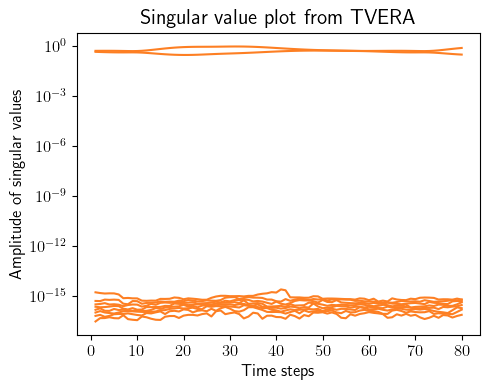

In [5]:
tvokid_ = sysID.tvokid(forced_inputs_training, forced_outputs_training, observer_order=10, number_of_parameters=50)

p = 10
q = p
tvera_ = sysID.tvera(tvokid_.hki, tvokid_.D, free_outputs_training, state_dimension, p, q, apply_transformation=True)

concatenated_singular_values = np.concatenate([arr[np.newaxis, 0:10] for arr in tvera_.Sigma[:-p]], axis=0).T

fig = plt.figure(num=1, figsize=[5, 4])

ax = fig.add_subplot(1, 1, 1)
for i in range(concatenated_singular_values.shape[0]):
    ax.semilogy(np.linspace(1, concatenated_singular_values.shape[1], concatenated_singular_values.shape[1]), concatenated_singular_values[i, :], color=(253/255, 127/255, 35/255))
plt.ylabel(r'Amplitude of singular values', fontsize=12)
plt.xlabel(r'Time steps', fontsize=12)
plt.title(r'Singular value plot from TVERA', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

x0_id = np.zeros(state_dimension)
identified_system = sysID.discrete_linear_model(frequency, x0_id, tvera_.A, B=tvera_.B, C=tvera_.C, D=tvera_.D)


\
&nbsp;
\
&nbsp;
Testing is accomplished using a sinusoidal signal for just under 10 seconds.

In [6]:
total_time_testing = 10 - (p+1) * dt
number_steps_testing = int(total_time_testing * frequency + 1)
tspan_testing = np.linspace(0, total_time_testing, number_steps_testing)

input_testing = sysID.discrete_signal(frequency=frequency, data=np.cos(5 * tspan_testing + np.pi/3))
output_testing_true = sysID.propagate(input_testing, true_system)[0]
output_testing_identified = sysID.propagate(input_testing, identified_system)[0]


\
&nbsp;
\
&nbsp;
Plotting.

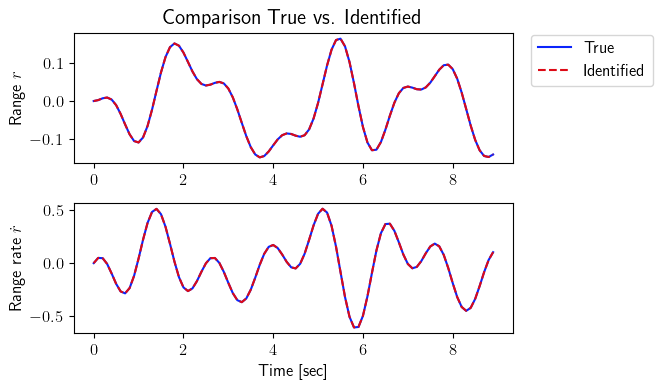

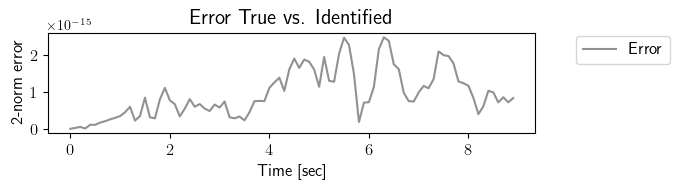

In [7]:
fig = plt.figure(num=2, figsize=[7, 4])

ax = fig.add_subplot(2, 1, 1)
ax.plot(tspan_testing, output_testing_true.data[0, :], color=(11/255, 36/255, 251/255), label=r'True')
ax.plot(tspan_testing, output_testing_identified.data[0, :], '--', color=(221/255, 10/255, 22/255), label=r'Identified')
plt.ylabel(r'Range $r$', fontsize=12)
plt.title(r'Comparison True vs. Identified', fontsize=15)
ax.legend(loc='upper center', bbox_to_anchor=(1.18, 1.05), ncol=1, fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

ax = fig.add_subplot(2, 1, 2)
ax.plot(tspan_testing, output_testing_true.data[1, :], color=(11/255, 36/255, 251/255))
ax.plot(tspan_testing, output_testing_identified.data[1, :], '--', color=(221/255, 10/255, 22/255))
plt.xlabel(r'Time [sec]', fontsize=12)
plt.ylabel(r'Range rate $\dot{r}$', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()


fig = plt.figure(num=3, figsize=[7, 2])

ax = fig.add_subplot(1, 1, 1)
ax.plot(tspan_testing, LA.norm(output_testing_true.data - output_testing_identified.data, axis=0), color=(145/255, 145/255, 145/255), label=r'Error')
plt.ylabel(r'2-norm error', fontsize=12)
plt.xlabel(r'Time [sec]', fontsize=12)
plt.title(r'Error True vs. Identified', fontsize=15)
ax.legend(loc='upper center', bbox_to_anchor=(1.18, 1.05), ncol=1, fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()


\
&nbsp;
\
&nbsp;
Eigenvalues of the true and raw identified models are compared. They don't match.

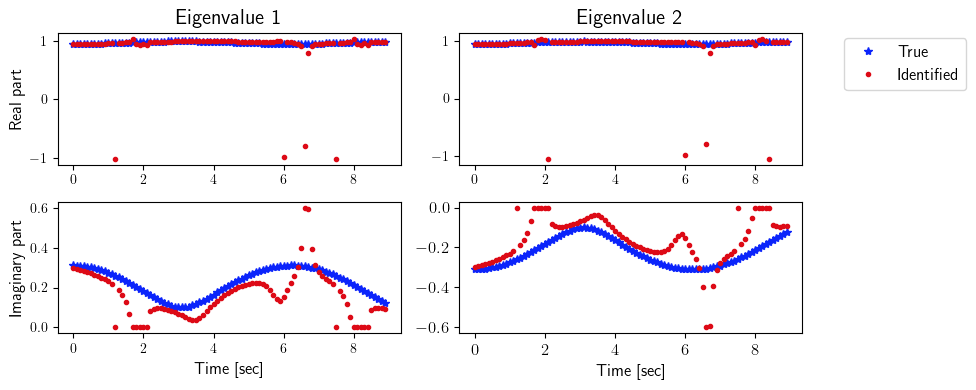

In [8]:
ev_true = np.zeros([2, state_dimension, number_steps_testing])
ev_identified = np.zeros([2, state_dimension, number_steps_testing])
for i in range(number_steps_testing):
    for j in range(state_dimension):
        ev_true[0, j, i] = np.real(LA.eig(true_system.A(i * dt))[0])[j]
        ev_true[1, j, i] = np.imag(LA.eig(true_system.A(i * dt))[0])[j]
        ev_identified[0, j, i] = np.real(LA.eig(identified_system.A(i * dt))[0])[j]
        ev_identified[1, j, i] = np.imag(LA.eig(identified_system.A(i * dt))[0])[j]

fig = plt.figure(num=4, figsize=[10, 4])

ax = fig.add_subplot(2, 2, 1)
ax.plot(tspan_testing, ev_true[0, 0, :], '*', color=(11/255, 36/255, 251/255), label=r'True')
ax.plot(tspan_testing, ev_identified[0, 0, :], '.', color=(221/255, 10/255, 22/255), label=r'Identified')
plt.ylabel(r'Real part', fontsize=12)
plt.title(r'Eigenvalue 1', fontsize=15)

ax = fig.add_subplot(2, 2, 2)
ax.plot(tspan_testing, ev_true[0, 1, :], '*', color=(11/255, 36/255, 251/255), label=r'True')
ax.plot(tspan_testing, ev_identified[0, 1, :], '.', color=(221/255, 10/255, 22/255), label=r'Identified')
plt.title(r'Eigenvalue 2', fontsize=15)
ax.legend(loc='upper center', bbox_to_anchor=(1.3, 1.02), ncol=1, fontsize=12)

ax = fig.add_subplot(2, 2, 3)
ax.plot(tspan_testing, ev_true[1, 0, :], '*', color=(11/255, 36/255, 251/255), label=r'True')
ax.plot(tspan_testing, ev_identified[1, 0, :], '.', color=(221/255, 10/255, 22/255), label=r'Identified')
plt.ylabel(r'Imaginary part', fontsize=12)
plt.xlabel(r'Time [sec]', fontsize=12)

ax = fig.add_subplot(2, 2, 4)
ax.plot(tspan_testing, ev_true[1, 1, :], '*', color=(11/255, 36/255, 251/255), label=r'True')
ax.plot(tspan_testing, ev_identified[1, 1, :], '.', color=(221/255, 10/255, 22/255), label=r'Identified')
plt.xlabel(r'Time [sec]', fontsize=12)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

\
&nbsp;
\
&nbsp;
Eigenvalues of the true and corrected identified models are compared. They now match.



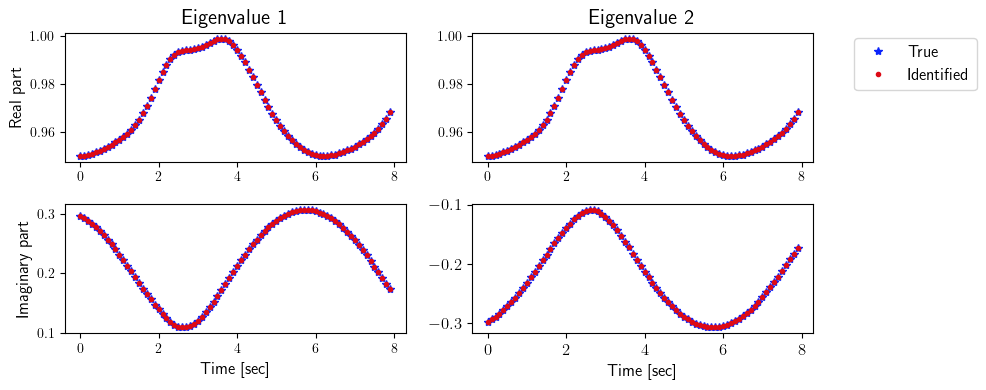

In [9]:
ev_true = np.zeros([2, state_dimension, number_steps_testing - p])
ev_identified = np.zeros([2, state_dimension, number_steps_testing - p])
for i in range(number_steps_testing - p):
    for j in range(state_dimension):
        O1_true = sysID.observability_matrix(true_system.A, true_system.C, p, tk=i * dt, dt=dt)
        O2_true = sysID.observability_matrix(true_system.A, true_system.C, p, tk=(i + 1) * dt, dt=dt)
        ev_true[0, j, i] = np.real(LA.eig(np.matmul(LA.pinv(O1_true), np.matmul(O2_true, true_system.A(i * dt))))[0])[j]
        ev_true[1, j, i] = np.imag(LA.eig(np.matmul(LA.pinv(O1_true), np.matmul(O2_true, true_system.A(i * dt))))[0])[j]
        
        O1_identified = sysID.observability_matrix(identified_system.A, identified_system.C, p, tk=i * dt, dt=dt)
        O2_identified = sysID.observability_matrix(identified_system.A, identified_system.C, p, tk=(i + 1) * dt, dt=dt)
        ev_identified[0, j, i] = np.real(LA.eig(np.matmul(LA.pinv(O1_identified), np.matmul(O2_identified, identified_system.A(i * dt))))[0])[j]
        ev_identified[1, j, i] = np.imag(LA.eig(np.matmul(LA.pinv(O1_identified), np.matmul(O2_identified, identified_system.A(i * dt))))[0])[j]

fig = plt.figure(num=4, figsize=[10, 4])

ax = fig.add_subplot(2, 2, 1)
ax.plot(tspan_testing[:-p], ev_true[0, 0, :], '*', color=(11/255, 36/255, 251/255), label=r'True')
ax.plot(tspan_testing[:-p], ev_identified[0, 0, :], '.', color=(221/255, 10/255, 22/255), label=r'Identified')
plt.ylabel(r'Real part', fontsize=12)
plt.title(r'Eigenvalue 1', fontsize=15)

ax = fig.add_subplot(2, 2, 2)
ax.plot(tspan_testing[:-p], ev_true[0, 1, :], '*', color=(11/255, 36/255, 251/255), label=r'True')
ax.plot(tspan_testing[:-p], ev_identified[0, 1, :], '.', color=(221/255, 10/255, 22/255), label=r'Identified')
plt.title(r'Eigenvalue 2', fontsize=15)
ax.legend(loc='upper center', bbox_to_anchor=(1.3, 1.02), ncol=1, fontsize=12)

ax = fig.add_subplot(2, 2, 3)
ax.plot(tspan_testing[:-p], ev_true[1, 0, :], '*', color=(11/255, 36/255, 251/255), label=r'True')
ax.plot(tspan_testing[:-p], ev_identified[1, 0, :], '.', color=(221/255, 10/255, 22/255), label=r'Identified')
plt.ylabel(r'Imaginary part', fontsize=12)
plt.xlabel(r'Time [sec]', fontsize=12)

ax = fig.add_subplot(2, 2, 4)
ax.plot(tspan_testing[:-p], ev_true[1, 1, :], '*', color=(11/255, 36/255, 251/255), label=r'True')
ax.plot(tspan_testing[:-p], ev_identified[1, 1, :], '.', color=(221/255, 10/255, 22/255), label=r'Identified')
plt.xlabel(r'Time [sec]', fontsize=12)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()